<a href="https://colab.research.google.com/github/ramonvluz/previsao-do-conjunto-de-dados-da-flor-de-iris/blob/main/Previs%C3%A3o_do_Conjunto_de_Dados_da_Flor_da_%C3%8Dris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão do Conjunto de Dados da Flor de Íris**

O conjunto de dados das flores Iris, ou conjunto de dados Iris de Fisher, é um conjunto multivariado introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, "The use of multiple measurements in taxonomic problems", como exemplo de análise discriminante linear. Também é conhecido como conjunto de dados Iris de Anderson, pois Edgar Anderson coletou os dados para quantificar a variação morfológica das flores Iris de três espécies relacionadas. Duas das três espécies foram coletadas na Península de Gaspé "todas do mesmo pasto, colhidas no mesmo dia e medidas ao mesmo tempo pela mesma pessoa com o mesmo aparelho".

## Objetivo do Projeto

O projeto tem como objetivo desenvolver modelos preditivos precisos para classificar corretamente as espécies de flores Iris (Iris setosa, Iris virginica e Iris versicolor) utilizando algoritmos de Machine Learning. Para isso, faremos análises preliminares para entender a distribuição dos dados, lidar com valores ausentes, verificar correlações, realizar descrições estatísticas e preparar os dados para a modelagem. Em seguida, avançaremos para a construção e comparação de diferentes modelos de Machine Learning a fim de resolver o problema. Vamos começar importando e explicando os dados para dar início ao projeto.

# **Importando oa Bibliotecas e os Dados**

[O conjunto de dados](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) contém 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro características foram medidas em cada amostra: comprimento e largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies.

In [28]:
import pandas as pd # Manipulação e análise de dados.
import numpy as np # Computação numérica, Suporte para arrays multidimensionais e funções matemáticas de alto desempenho.
import matplotlib.pyplot as plt # Visualizações estáticas, animadas e interativas
import seaborn as sns # Interface de alto nível para a criação de gráficos estatísticos atraentes e informativos.

from sklearn.preprocessing import StandardScaler, LabelEncoder # Padronização das features do dataset e conversão de labels.
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix # Avaliação para modelos de classificação com a curva ROC e matriz de confusão.
from sklearn.model_selection import train_test_split # Divisão entre treino e teste
from sklearn.linear_model import LogisticRegression # Modelo de Regressão Logística
from sklearn.tree import DecisionTreeClassifier # Modelo para Árvores de Decisão
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC # Support Vector Classifier
from xgboost import XGBClassifier # Modelo XGBoost
from imblearn.under_sampling import RandomUnderSampler # Realizar subamostragem aleatória em conjuntos de dados desbalanceados

In [29]:
# Importando os dados para um DataFrame

iris = '/content/drive/MyDrive/Colab Notebooks/Conjunto Iris/Iris.csv'

df = pd.read_csv(iris)

- Para melhorar a visualização do df farei as seguinte modificações:
  
  - Eliminar as coluna **Id**.
  - Renomear as colunas restantes para o português, ultilizando o padrão ***snake_case*** (letras minúsculas com palavras separadas por sublinhado).
  - Retirar o prefixo **"Iris-"** das entradas na coluna **"especie"**.

In [30]:
# Melhorando a visualização do DataFrame

# Removendo a coluna 'Id'

df = df.drop(columns=['Id'])

# Renomeando as colunas restantes

df = df.rename(columns={
    'SepalLengthCm': 'altura_sepala',
    'SepalWidthCm': 'largura_sepala',
    'PetalLengthCm': 'altura_petala',
    'PetalWidthCm': 'largura_petala',
    'Species': 'especie'
})

# Removendo o prefixo "Iris-"

df['especie'] = df['especie'].str.replace('Iris-', '')

df.head()

,altura_sepala,largura_sepala,altura_petala,largura_petala,especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Dicionário de Variáveis**

- **altura_sepala**: comprimento da sépala em centímetros.
- **largura_sepala**: largura da sépala em centímetros.
- **altura_petala**: comprimento da pétala em centímetros.
- **largura_petala**: largura da pétala em centímetros.
- **especie**: espécie da flor (setosa, versicolor, virginica).

- Agora, com um visual mais limpo e o dicionário das variáveis criado, seguirei para a Análise Exploratoria dos dados.

# **Análise Exploratória**

## **Visualização dos Dados**

- Primeiro, visualizarei uma amostra dos dados para entender melhor sua estrutura.

In [31]:
# Visualizando o df

print(df.head(3))

   altura_sepala  largura_sepala  altura_petala  largura_petala especie
0            5.1             3.5            1.4             0.2  setosa
1            4.9             3.0            1.4             0.2  setosa
2            4.7             3.2            1.3             0.2  setosa


In [32]:
# Verificando as informações basicas do DataFrame

print(df.info())
print("---------------------------------------------")
print(df.nunique())
print("---------------------------------------------")
print(f"Número de valores duplicados: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   altura_sepala   150 non-null    float64
 1   largura_sepala  150 non-null    float64
 2   altura_petala   150 non-null    float64
 3   largura_petala  150 non-null    float64
 4   especie         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
---------------------------------------------
altura_sepala     35
largura_sepala    23
altura_petala     43
largura_petala    22
especie            3
dtype: int64
---------------------------------------------
Número de valores duplicados: 3


- Nessas primeiras observações posso notar que:

  - A variável alvo, **"especie"**, possui dados do tipo **"Object"**.
    - Será presciso uma codificação posteriormente, afim de treinar os modelos.
  - Os dados de entrada são do tipo **"Foalt64"**.
    - Será feito uma padronização
  - Não aparenta ter valores nulos.
  - E possui três valores duplicado.

## Descrição Estatística

In [33]:
# Visualizando a descrição estatística dos dados

print(df.describe(include='all').T)

                count unique     top freq      mean       std  min  25%   50%  \
altura_sepala   150.0    NaN     NaN  NaN  5.843333  0.828066  4.3  5.1   5.8   
largura_sepala  150.0    NaN     NaN  NaN     3.054  0.433594  2.0  2.8   3.0   
altura_petala   150.0    NaN     NaN  NaN  3.758667   1.76442  1.0  1.6  4.35   
largura_petala  150.0    NaN     NaN  NaN  1.198667  0.763161  0.1  0.3   1.3   
especie           150      3  setosa   50       NaN       NaN  NaN  NaN   NaN   

                75%  max  
altura_sepala   6.4  7.9  
largura_sepala  3.3  4.4  
altura_petala   5.1  6.9  
largura_petala  1.8  2.5  
especie         NaN  NaN  


- Ao analisar as informações acima, observo que:

  - Todas as variáveis possuem a mesma quantidade de valores.
  - A média das alturas são maiores que a média das larguras.
  - Altura máxima das sépalas é 7.9 cm enquando a da pétala é 6.9, uma diferença de 1 cm.
  - A largura máxima das sápalas é 4.4 cm, enquanto a da pétala chega a 2.2 cm. Mostrando uma maior variação em relação a altura.
  - A variável **"especie"** possui 3 valores unicos.

## **Verificação de Valores Nulos**

In [34]:
# Verificando os valores nulos

print(df.isnull().sum())

altura_sepala     0
largura_sepala    0
altura_petala     0
largura_petala    0
especie           0
dtype: int64


- Verifiquei se há valores nulos no conjunto de dados, o que exigiria ações como o preenchimento com zeros, mediana ou a exclusão das linhas afetadas, dependendo do problema. Isso é necessário porque modelos de Machine Learning não podem lidar com valores nulos.

- Felizmente o conjunto de dados não possui valores  nulos, então não precisarei fazer nenhum tratamento.

## **Distribuição das Classes**

In [35]:
# Verificando os valores únicos da classe "espécies"

print(df["especie"].unique())

['setosa' 'versicolor' 'virginica']


In [36]:
# Verificando o balanceamento do conjunto de dados

# Contando as ocorrências de cada espécie
especies_contagem = df["especie"].value_counts()

# Calculando as porcentagens de cada espécie
total_registros = df.shape[0]

# Exibindo o resultado
for especie, count in especies_contagem.items():
    perc = (count / total_registros) * 100
    print(f"{especie} representa: {perc:.2f}% do conjunto de dados")

setosa representa: 33.33% do conjunto de dados
versicolor representa: 33.33% do conjunto de dados
virginica representa: 33.33% do conjunto de dados


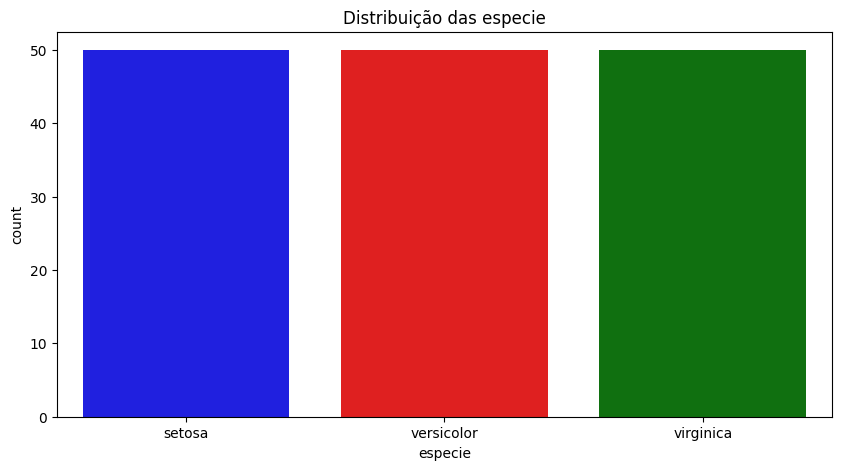

In [37]:
# Gráfico de barras para as classes

colors = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}

# Criando uma figura e eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Plotando o gráfico de barras
sns.countplot(x=df["especie"], ax=ax, hue=df["especie"], palette=colors.values(), legend=False)
ax.set_title("Distribuição das especie")

# Contando as ocorrências de cada classe
class_counts = df["especie"].value_counts()

plt.show()

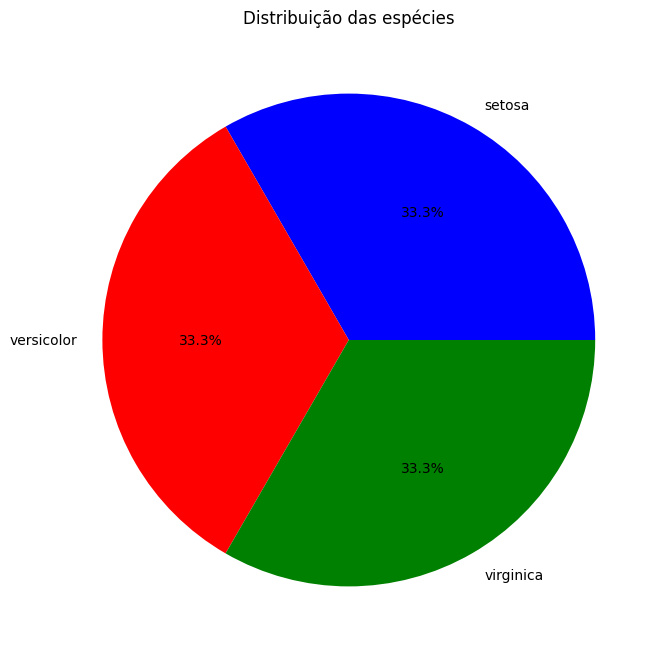

In [38]:
# Gráfico de setor

# Criando uma figura e eixo
fig, ax = plt.subplots(figsize=(8, 8))

# Plotando o gráfico
especies_contagem.plot.pie(autopct='%1.1f%%', colors=colors.values(), ax=ax)
ax.set_ylabel('')
ax.set_title("Distribuição das espécies")
plt.show()


- Com as análises feitas acima, percebo que:

  - A classe **especie** possui três valores distintos.
  - Iris-setosa, Iris-versicolor e Iris-virginica.
  - Cada uma representando 33,33% dos dados.

- Felizmente o conjunto de dados está balanceado, então não precisarei fazer nenhum tratamento.

## **Análise de Outliers**

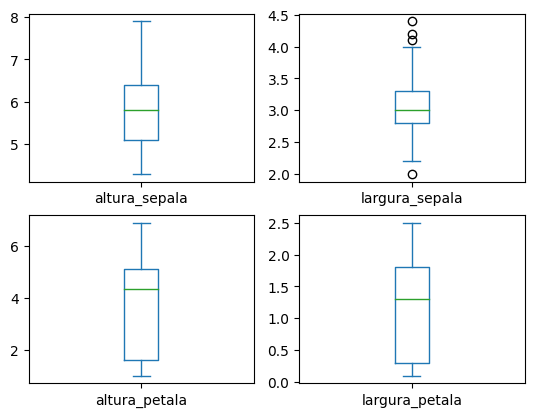

In [39]:
# Visualizando valores outliers

df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

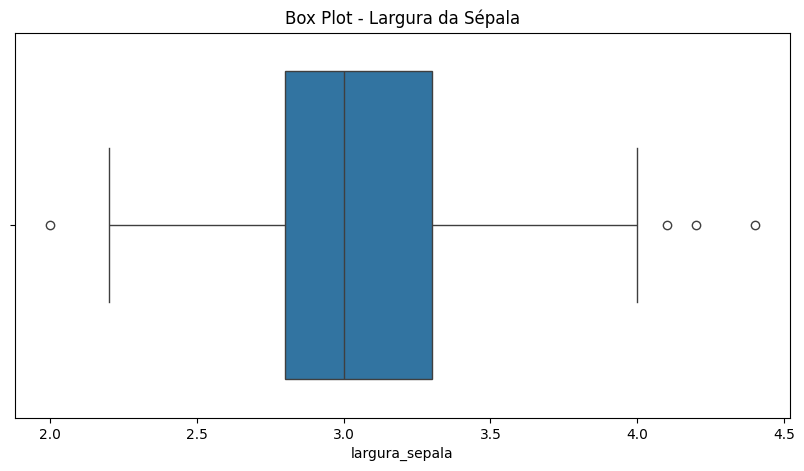

In [40]:
# Box plot para largura da sépala com destaque nos outliers

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['largura_sepala'])
plt.title('Box Plot - Largura da Sépala')
plt.show()

In [41]:
# Calculando os limites de detecção de outliers usando IQR

Q1 = df['largura_sepala'].quantile(0.25)
Q3 = df['largura_sepala'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior para detecção de outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['largura_sepala'] < lower_bound) | (df['largura_sepala'] > upper_bound).T]
print(f"Outliers na largura da sépala:\n{outliers}")

Outliers na largura da sépala:
    altura_sepala  largura_sepala  altura_petala  largura_petala     especie
15            5.7             4.4            1.5             0.4      setosa
32            5.2             4.1            1.5             0.1      setosa
33            5.5             4.2            1.4             0.2      setosa
60            5.0             2.0            3.5             1.0  versicolor


- Identifiquei valores outliers na variável **"largura da sépala"**, que serão tratados posteriormente.
- Vale notar que os valores outlier estão bem proximo das medianas de suas respectivas especies.

## **Análise de Correlação**

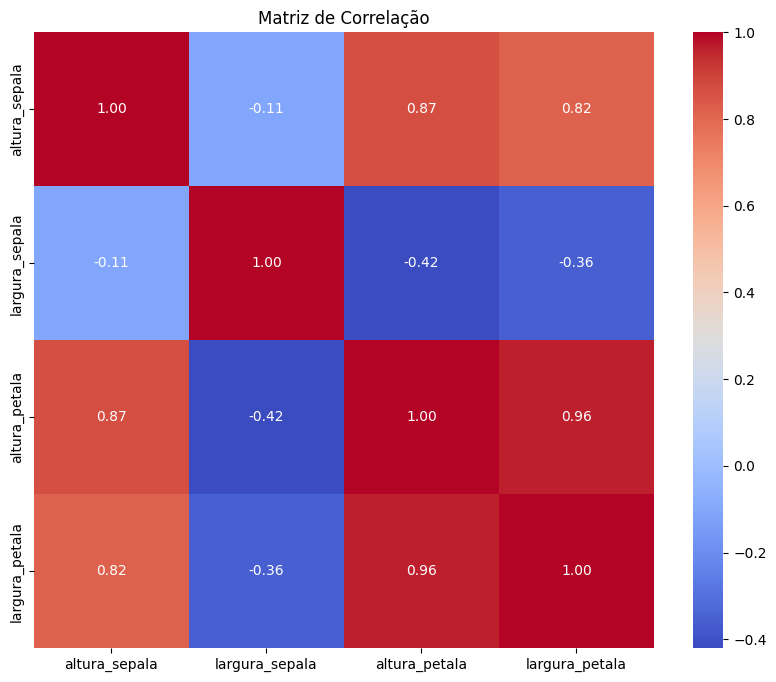

In [42]:
# Excluindo a coluna 'especie' do cálculo da correlação
correlation_matrix = df.drop(columns=['especie']).corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

- Com a análise percebo que:

  - A maior correlação esta entre a **altura da pétala** com a **largura da sépala**.
  - Seguido pela **largura da pétala** e **largura da sépala**.
  - O que indica que quando maior ou menos as medidas da pétala, maior ou nenor as medidas da sépala.

## **Análise Multivariada**

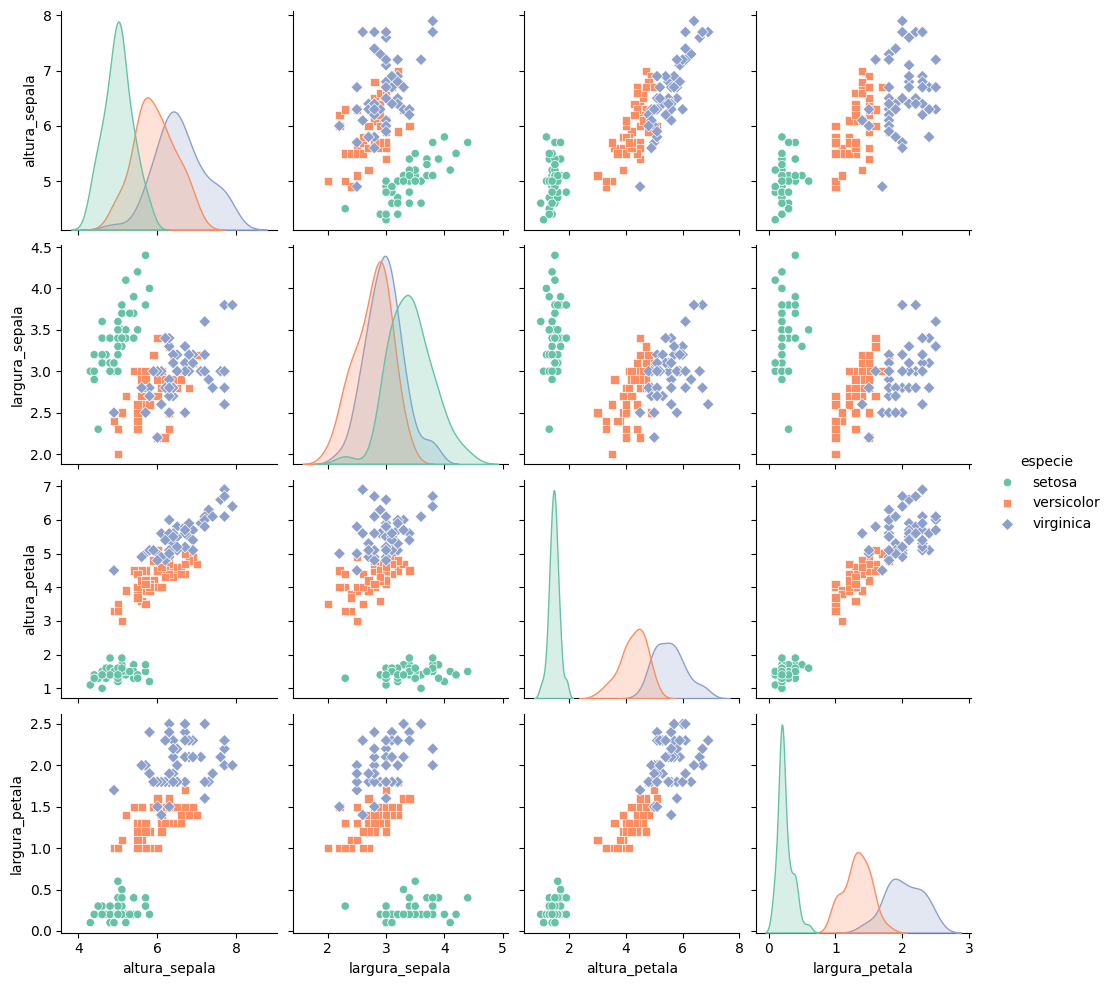

In [43]:
# Visualizando a relação entre as features e a classe

sns.pairplot(df, hue="especie", markers=["o", "s", "D"], palette="Set2")
plt.show()

- As variávei apresentam um distrubuição proxima da normal.
- A espécie Iris-setosa esta claramente bem agrupada e não será dificio para o modelo identifica-las.
- Apesar de na largura e altura da sépala as especies versicolor e virginica serem dificis de se identificar, as relações entre as outras variáveis dessas especies o modelo consiguira indentifica-las tambem sem problemas.

# **Modelagem e Preparação de Dados**

## **Tratando os valores outliers**

O tratamento de valores outliers refere-se ao processo de identificar, analisar e lidar com os dados que se desviam significativamente da maioria das observações em um conjunto de dados. Esses valores podem resultar de erros de medição, erros de entrada de dados ou podem ser valores legítimos que representam variações extremas ou anômalas.

In [44]:
# Calculando a mediana da largura da sépala

mediana_largura_sepala = df['largura_sepala'].median()

# Substituindo os outliers pela mediana

df.loc[(df['largura_sepala'] < lower_bound) | (df['largura_sepala'] > upper_bound), 'largura_sepala'] = mediana_largura_sepala

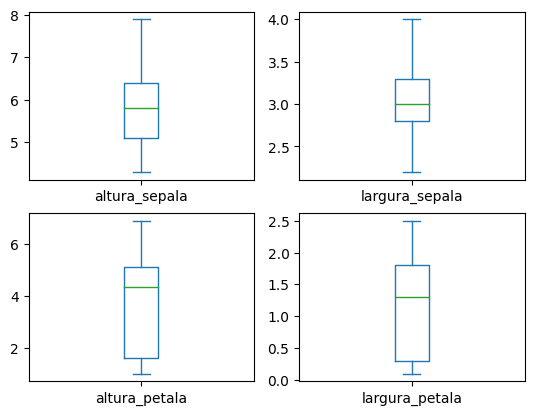

In [45]:
# Conferindo o tratamento

df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

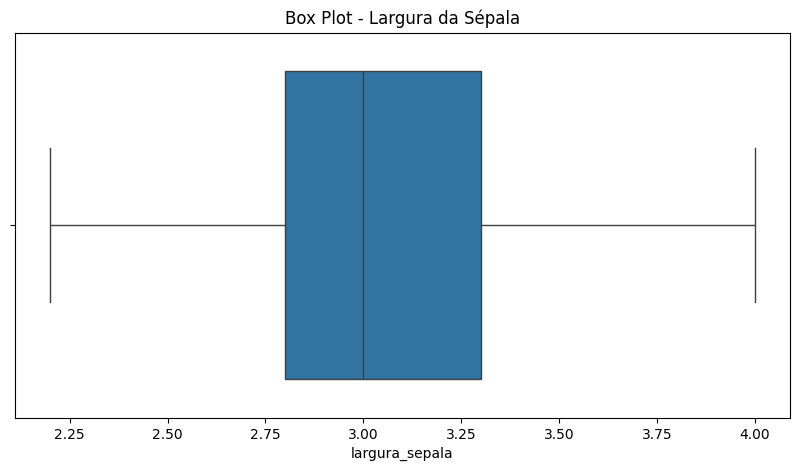

In [46]:
# Confirmando o tratamento

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['largura_sepala'])
plt.title('Box Plot - Largura da Sépala')
plt.show()

- Como o conjunto de dados é muito pequeno e considerando que ha apenas quatro valorer discrepantes, decidi por sustitur os valores outlier pela suas medianas, que não estão muito distantes dos valores outliers.

## Codificando a Coluna **"especie"**


A codificação de variáveis é o processo de transformar dados categóricos ou qualitativos em um formato numérico que possa ser utilizado em modelos de machine learning e análises estatísticas. Isso é necessário porque muitos algoritmos de machine learning só podem lidar com dados numéricos. Existem várias técnicas de codificação de variáveis, como a codificação one-hot, a codificação ordinal e a codificação de frequência, cada uma sendo aplicável dependendo do tipo de dados categóricos e das necessidades do modelo em questão.

- Aqui usarei a técnica one-hot




In [47]:
# Convertendo a coluna 'especie' em variáveis numéricas usando codificação one-hot no conjunto de treino

df_encoded = pd.get_dummies(df, columns=['especie']).astype(int)

In [48]:
# Conferindo a codificação no conjunto de treino

df_encoded.head(2)

,altura_sepala,largura_sepala,altura_petala,largura_petala,especie_setosa,especie_versicolor,especie_virginica
0,5,3,1,0,1,0,0
1,4,3,1,0,1,0,0


- Como a maioria dos modelos de machine Learning não tralham com dados do tipo objct, usei a tecnica do one-hot-encoder para codificar esses dados para o tipo numerico.

## Padronizando as Variáveis de Entrada

A padronização de dados, ou normalização, é um processo comum no pré-processamento de dados que transforma os valores das variáveis para uma escala comum. O objetivo é garantir que todas as variáveis tenham a mesma ordem de grandeza, eliminando diferenças de escala entre elas.

A padronização envolve calcular a média e o desvio padrão dos dados, subtraindo a média de cada valor e dividindo pelo desvio padrão. Isso resulta em uma distribuição com média zero e desvio padrão um.

In [49]:
# Padronizando as variáveis de entrada

# Separando as variáveis de entrada das variáveis de saída

X = df_encoded.drop(['especie_setosa', 'especie_versicolor', 'especie_virginica'], axis=1)

# Padronizando as variáveis de entrada

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar um novo DataFrame com as variáveis padronizadas e as variáveis numéricas da coluna 'especie'

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled[['especie_setosa', 'especie_versicolor', 'especie_virginica']] = df_encoded[['especie_setosa', 'especie_versicolor', 'especie_virginica']]

In [50]:
# Conferindo a padronização nas variáveis de entrada no conjunto de treino

df_scaled.head(2)

,altura_sepala,largura_sepala,altura_petala,largura_petala,especie_setosa,especie_versicolor,especie_virginica
0,-0.460898,0.73994,-1.306042,-1.207719,1,0,0
1,-1.652877,0.73994,-1.306042,-1.207719,1,0,0


# **Criando um Conjunto de Validação**

Um conjunto de validação é uma parte do conjunto de dados original que é separada para avaliar o desempenho de um modelo de aprendizado de máquina durante o processo de treinamento. Ele é utilizado para ajustar os hiperparâmetros do modelo e evitar o overfitting. O conjunto de validação não é usado para treinar o modelo, mas para validar sua performance em dados que ele ainda não viu.

In [51]:
# Criando o conjunto de validação mantendo o balanceamento das classes

# Dividindo o conjunto de dados em treino e validação mantendo o balanceamento das classes

treino_df, validacao_df = train_test_split(df, test_size=0.10, random_state=0, stratify=df['especie'])

# Verificando o conjunto de dados após a separação

print(f"Dimensão do Conjunto Original: {df.shape}")
print(f"Dimensão do Conjunto de Treino: {treino_df.shape}")
print(f"Dimensão do Conjunto de Validação: {validacao_df.shape}")
print("")
print("---------------------------------------------------")
print("")

# Verificando a distribuição das classes nos conjuntos de treino e validação

print(f"Distribuição das Classes no Conjunto de Treino:\n{treino_df['especie'].value_counts()}")
print("")
print("---------------------------------------------------")
print("")
print(f"Distribuição das Classes no Conjunto de Validação:\n{validacao_df['especie'].value_counts()}")

Dimensão do Conjunto Original: (150, 5)
Dimensão do Conjunto de Treino: (135, 5)
Dimensão do Conjunto de Validação: (15, 5)

---------------------------------------------------

Distribuição das Classes no Conjunto de Treino:
especie
versicolor    45
virginica     45
setosa        45
Name: count, dtype: int64

---------------------------------------------------

Distribuição das Classes no Conjunto de Validação:
especie
versicolor    5
setosa        5
virginica     5
Name: count, dtype: int64


- 90% do dados do DataFrame original foram separados para criar um conjunto de **Treino ("treino_df")**, mantendo o balanceamento das classes.
  - Ele será usado para treinar os modelos.

- 10% dos dados do DataFrame original foram separados para um conjunto de **Validação ("valicao_df")**, também mantendo o mesmo balanceamento entre as classes.
  - Após criar e ajustar os modelos de Machine Learning, utilizarei esse dados para testar e avaliar sua eficácia com dados novos, nunca antes visto pelos modelos.

# **Modelos**

## **Escolha dos Modelos**

In [52]:
# Escolhendo os modelos

svm_model = SVC(kernel='rbf', random_state=0)
rf_model = RandomForestClassifier(random_state=0)
gbm_model = GradientBoostingClassifier(random_state=0)
xgb_model = XGBClassifier(random_state=0)
lr_model = LogisticRegression(random_state=0, max_iter=1000)

- Nesse porjeto optei por ultilizar os seguintes modelos:

  1. Support Vector Machines (SVM):
    - Modelo versátil para classificação e regressão.
    - Eficiente em conjuntos de dados de alta dimensionalidade.
    - Pode lidar com dados separáveis linearmente e não linearmente por meio do uso de diferentes kernels.

  2. Random Forest:
    - Ensemble de árvores de decisão que combina várias árvores para obter predições mais robustas.
    - Ótimo para classificação e regressão.
    - Lida bem com grandes conjuntos de dados e muitas variáveis de entrada, reduzindo overfitting.

  3. Gradient Boosting Machines (GBM):
    - Técnica de boosting que combina vários modelos simples (geralmente árvores de decisão fracas) para criar um modelo mais forte.
    - Melhora a precisão dos modelos de árvore de decisão ao reduzir o viés e a variância.
    - Propenso a overfitting em conjuntos de dados menores ou com ruído, mas pode ser regularizado.

  4. XGBoost:
    - Implementação eficiente e escalável do algoritmo de Gradient Boosting.
    - Oferece melhorias significativas em desempenho e eficiência computacional em comparação com o GBM tradicional.
    - Usa técnicas avançadas de regularização para reduzir overfitting e melhorar a generalização do modelo.

  5. Regressão Logística:
    - Modelo clássico para problemas de classificação binária e multiclasse.
    - Eficiente computacionalmente e fácil de interpretar, fornecendo coeficientes para cada variável de entrada.
    - Adequado para conjuntos de dados de tamanho moderado e relação linear ou aproximadamente linear entre variáveis independentes e dependentes.

## **Treinamento dos Modelos com os Dados de Treino**

In [53]:
# Função para treinar os modelos

def train_models(model, X_train, y_train):
    # Converte rótulos de string em rótulos numéricos
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model.fit(X_train, y_train)

# Treinando os modelos com os dados de Treino "treino_df"

train_models(svm_model, treino_df.drop('especie', axis=1), treino_df['especie'])
train_models(rf_model, treino_df.drop('especie', axis=1), treino_df['especie'])
train_models(gbm_model, treino_df.drop('especie', axis=1), treino_df['especie'])
train_models(xgb_model, treino_df.drop('especie', axis=1), treino_df['especie'])
train_models(lr_model, treino_df.drop('especie', axis=1), treino_df['especie'])

# Função para avaliar os modelos

def evaluate_train_models(model, X_train, y_train, model_name):
    # Converte rótulos de string em rótulos numéricos
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    y_pred = model.predict(X_train)
    print(f"Relatório de Avaliação do Modelo {model_name}:")
    print(classification_report(y_train, y_train))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_train, y_train))
    print("-----------------------------------------------")

# Avaliação dos modelos com os dados de validação

evaluate_train_models(svm_model, treino_df.drop('especie', axis=1), treino_df['especie'], "SVM")
evaluate_train_models(rf_model, treino_df.drop('especie', axis=1), treino_df['especie'], "Random Forest")
evaluate_train_models(gbm_model, treino_df.drop('especie', axis=1), treino_df['especie'], "Gradient Boosting Machines")
evaluate_train_models(xgb_model, treino_df.drop('especie', axis=1), treino_df['especie'], "XGBoost")
evaluate_train_models(lr_model, treino_df.drop('especie', axis=1), treino_df['especie'], "Regressão Logística")

Relatório de Avaliação do Modelo SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        45

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Matriz de Confusão:
[[45  0  0]
 [ 0 45  0]
 [ 0  0 45]]
-----------------------------------------------
Relatório de Avaliação do Modelo Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        45

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Matriz de Confusão:
[[45  0  0]
 [ 0 45  0]
 [ 

## **Avaliação dos Modelos com os Dados de Validação**

In [54]:
# Função para validar os modelos com os dados de Validação ("validacao_df")

def evaluate_valid_models(model, X_valid, y_valid, model_name):
    # Converte rótulos de string em rótulos numéricos
    le = LabelEncoder()
    y_valid = le.fit_transform(y_valid)

    y_pred = model.predict(X_valid)
    print(f"Relatório de Avaliação do Modelo {model_name}:")
    print(classification_report(y_valid, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_valid, y_pred))
    print("-----------------------------------------------")

# Avaliação dos modelos com os dados de validação

evaluate_valid_models(svm_model, validacao_df.drop('especie', axis=1), validacao_df['especie'], "SVM")
evaluate_valid_models(rf_model, validacao_df.drop('especie', axis=1), validacao_df['especie'], "Random Forest")
evaluate_valid_models(gbm_model, validacao_df.drop('especie', axis=1), validacao_df['especie'], "Gradient Boosting Machines")
evaluate_valid_models(xgb_model, validacao_df.drop('especie', axis=1), validacao_df['especie'], "XGBoost")
evaluate_valid_models(lr_model, validacao_df.drop('especie', axis=1), validacao_df['especie'], "Regressão Logística")


Relatório de Avaliação do Modelo SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Matriz de Confusão:
[[5 0 0]
 [0 5 0]
 [0 0 5]]
-----------------------------------------------
Relatório de Avaliação do Modelo Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

Matriz de Confusão:
[[5 0 0]
 [0 5 0]
 [0 2 3]]
--------

# **Conclusão**

Após avaliar os modelos de Machine Learning com os dados de treino e validação do conjunto de dados Iris, podemos concluir:

1. **Desempenho nos Dados de Treino:**
   - Todos os modelos tiveram desempenho satisfatório nos dados de treino, alguns atingindo precisão, recall e f1-score de 1.00, indicando que memorizaram bem os padrões do treino.

2. **Desempenho nos Dados de Validação:**
   - O modelo SVM manteve desempenho perfeito nos dados de validação, com precisão, recall e f1-score de 1.00, mostrando boa capacidade de generalização.
   - Random Forest, Gradient Boosting Machines e XGBoost apresentaram resultados ligeiramente inferiores nos dados de validação comparados aos de treino, com precisão em torno de 0.90 e f1-score entre 0.86 e 0.94.
   - A Regressão Logística também manteve desempenho perfeito nos dados de validação, refletindo boa generalização e consistência.

3. **Variação de Desempenho entre Modelos:**
   - Houve pequena variação nos resultados entre os modelos, principalmente nos dados de validação. Enquanto SVM e Regressão Logística mantiveram desempenho consistente, os modelos baseados em árvores mostraram ligeira queda em relação aos dados de treino.

4. **Escolha do Melhor Modelo:**
   - O modelo SVM se destaca por manter desempenho perfeito tanto nos dados de treino quanto nos de validação, sugerindo robusta capacidade de classificação e menor propensão ao overfitting.
   - A Regressão Logística também se mostra uma escolha sólida, mantendo desempenho perfeito em ambas as etapas de avaliação.

Em resumo, SVM e Regressão Logística são os modelos mais robustos e confiáveis para classificar as espécies de flores no conjunto de dados Iris, considerando o desempenho nos dados de treino e validação.